# <center> **Filling Regions**

## **1. Importing data from Google Drive**

In [ ]:
# Montando o drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Processamento Digital de Imagem

/content/drive/MyDrive/Processamento Digital de Imagem


In [ ]:
%cd Preenchendo\ Regiões

/content/drive/MyDrive/Processamento Digital de Imagem/Preenchendo Regiões


## **2. Importing necessary libraries**

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

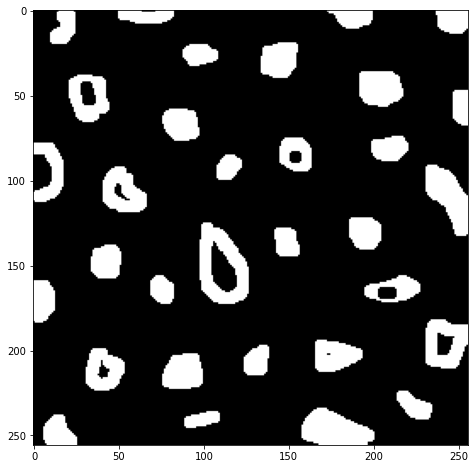

In [ ]:
# Creating a canvas #

plt.subplots(figsize=(15, 8))

# Reading the image #
img = Image.open('images/bolhas.png').convert("L")  # for RGB images, need to convert #
img = np.asarray(img)

# Plotting the image #
plt.imshow(img, cmap = 'gray')
plt.show()

## **3. Couting Bubbles**

In [ ]:
# Importing the image again #
img = cv.imread('images/bolhas.png', cv.IMREAD_GRAYSCALE)

In [ ]:
def countBubbles(img):
    
    b_objects = 0

    shape = np.shape(img)

    copy_img = img.copy()

    for i in range(0, shape[0]):
        for j in range(0, shape[1]):
            if(copy_img[i][j] == 255):
                b_objects += 1
                #cv.floodFill(image=copy_img, seedPoint=(j, i), newVal=(b_objects), mask=mask, loDiff= (10,10,10), upDiff=(10,10,255), flags = cv.FLOODFILL_FIXED_RANGE)
                cv.floodFill(image=copy_img, seedPoint=(j, i), newVal=(b_objects), mask=None)

    print("Image Height: {}\nImage Width: {}".format(shape[0], shape[1]))
    print("Quantidade de bolhas: {}".format(b_objects))
    
    return copy_img

Image Height: 256
Image Width: 256
Quantidade de bolhas: 32


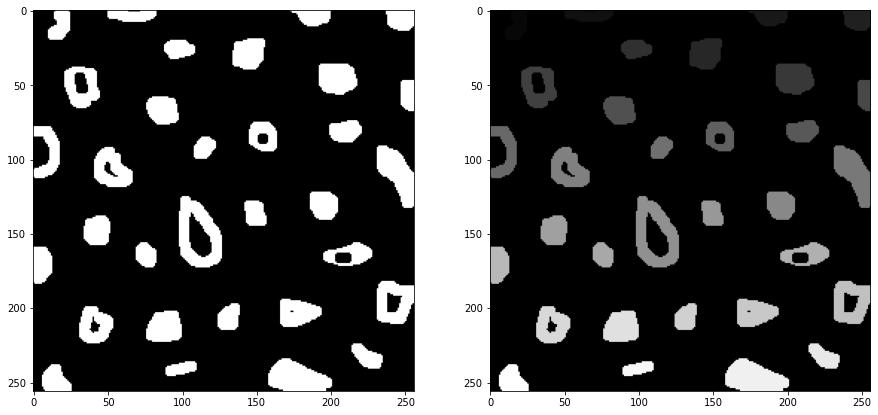

In [ ]:
copy_img = countBubbles(img)

# ploting image #
f, ax = plt.subplots(1, 2, figsize=(15, 8))

# Plotando a imagem #
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(copy_img, cmap = 'gray')

plt.show()

## **4. Counting Bubbles with holes and no holes**

For this problem, we can just fill all the background of the image with white and then make a count for the number of holes.

and to abtain the number of bubbles with no hole we just need to subtract.

Let's create a function to do this job for us.

In [ ]:
# Importing the image again #
img = cv.imread('images/bolhas.png', cv.IMREAD_GRAYSCALE)

In [ ]:
# Filling the background #
copy_img = img.copy()
cv.floodFill(image=copy_img, seedPoint=(0, 0), newVal=(255), mask=None)

(53832, array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), None, (0,
  0,
  256,
  256))

In [ ]:
# count holes #
def countHoles(img):
    
    # Filling the back ground #
    copy_img = img.copy()
    cv.floodFill(image=copy_img, seedPoint=(0, 0), newVal=(255), mask=None)
    
    b_objects = 0

    shape = np.shape(img)

    for i in range(0, shape[0]):
        for j in range(0, shape[1]):
            if(copy_img[i][j] == 0):
                b_objects += 1
                #cv.floodFill(image=copy_img, seedPoint=(j, i), newVal=(b_objects), mask=mask, loDiff= (10,10,10), upDiff=(10,10,255), flags = cv.FLOODFILL_FIXED_RANGE)
                cv.floodFill(image=copy_img, seedPoint=(j, i), newVal=(255), mask=None)

    print("Image Height: {}\nImage Width: {}".format(shape[0], shape[1]))
    print("Quantidade de bolhas: {}".format(b_objects))

In [ ]:
# Counting holes #
countHoles(copy_img)

Image Height: 256
Image Width: 256
Quantidade de bolhas: 10


But if we want a function that say the number of bubbles with hole and no hole we must create another function:

In [ ]:
# Count Holes and No holes #
def countHolesBubbles(img):
    
    b_objects = 0
    b_holes = 0

    shape = np.shape(img)

    copy_img = img.copy()

    for i in range(0, shape[0]):
        for j in range(0, shape[1]):
            if(copy_img[i][j] == 255):
                b_objects += 1
                #cv.floodFill(image=copy_img, seedPoint=(j, i), newVal=(b_objects), mask=mask, loDiff= (10,10,10), upDiff=(10,10,255), flags = cv.FLOODFILL_FIXED_RANGE)
                cv.floodFill(image=copy_img, seedPoint=(j, i), newVal=(b_objects), mask=None)
    
    # Filling the back ground #
    copy_img = img.copy()
    cv.floodFill(image=copy_img, seedPoint=(0, 0), newVal=(255), mask=None)

    for i in range(0, shape[0]):
        for j in range(0, shape[1]):
            if(copy_img[i][j] == 0):
                b_holes += 1
                #cv.floodFill(image=copy_img, seedPoint=(j, i), newVal=(b_objects), mask=mask, loDiff= (10,10,10), upDiff=(10,10,255), flags = cv.FLOODFILL_FIXED_RANGE)
                cv.floodFill(image=copy_img, seedPoint=(j, i), newVal=(255), mask=None)

    print("Quantidade de bolhas: {}".format(b_objects))
    print("Quantidade de bolhas com buracos: {}".format(b_holes))
    print("Quantidade de bolhas sem buracos: {}".format(b_objects - b_holes))

In [ ]:
countHolesBubbles(img)

Quantidade de bolhas: 32
Quantidade de bolhas com buracos: 10
Quantidade de bolhas sem buracos: 22


## **5. Ignoring bubbles at the Edge of an image**

We can solve this problem Applying floodfill in an white pixel near he edge 

In [ ]:
def noBubblesEdge(img):

  shape = np.shape(img)

  copy_img = img.copy()

  for i in list([0, shape[0]-1]):
    for j in range(0, shape[1]):
      if(copy_img[i][j] == 255):
        cv.floodFill(image=copy_img, seedPoint=(j, i), newVal=0, mask=None)

  for i in range(0, shape[0]):
    for j in list([0, shape[1]-1]):
      if(copy_img[i][j] == 255):
        cv.floodFill(image=copy_img, seedPoint=(j, i), newVal=0, mask=None)

  return copy_img

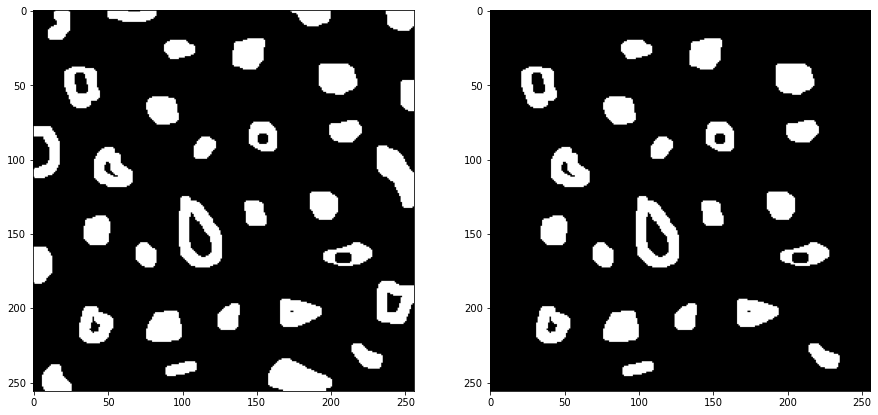

In [ ]:
img_noEdge = noBubblesEdge(img)

# ploting image #
f, ax = plt.subplots(1, 2, figsize=(15, 8))

# Plotando a imagem #
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(img_noEdge, cmap = 'gray')

plt.show()

In [ ]:
countHolesBubbles(img_noEdge)

Quantidade de bolhas: 21
Quantidade de bolhas com buracos: 7
Quantidade de bolhas sem buracos: 14
